# Import libraries to be used

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

%matplotlib inline
warnings.simplefilter('ignore')
plt.style.use('ggplot')

# Loading the two datasets to the interface

In [2]:
survey_raw = pd.read_csv('survey_results_public.csv')
survey_raw

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [3]:
survey_raw.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [4]:
schema_raw = pd.read_csv('survey_results_schema.csv', index_col='qname')
schema_raw

,qid,question,force_resp,type,selector
qname,,,,,
S0,QID16,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,QID12,Browser Meta Info,False,Meta,Browser
S1,QID1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
MainBranch,QID2,Which of the following options best describes ...,True,MC,SAVR
Employment,QID24,Which of the following best describes your cur...,False,MC,MAVR
Country,QID6,"Where do you live? <span style=""font-weight: b...",True,MC,DL
US_State,QID7,<p>In which state or territory of the USA do y...,False,MC,DL
UK_Country,QID9,In which part of the United Kingdom do you liv...,False,MC,DL
S2,QID190,"<span style=""font-size:22px; font-family: aria...",False,DB,TB


In [5]:
schema_df = schema_raw.drop(columns=['qid', 'force_resp', 'type', 'selector']).question
schema_df

qname
S0                    <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                              Browser Meta Info
S1                    <span style="font-size:22px; font-family: aria...
MainBranch            Which of the following options best describes ...
Employment            Which of the following best describes your cur...
Country               Where do you live? <span style="font-weight: b...
US_State              <p>In which state or territory of the USA do y...
UK_Country            In which part of the United Kingdom do you liv...
S2                    <span style="font-size:22px; font-family: aria...
EdLevel               Which of the following best describes the high...
Age1stCode            At what age did you write your first line of c...
LearnCode             How did you learn to code? Select all that apply.
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many ye

# Data Cleaning and Preparation

This is done to reduce the errors that may arise during analysis.
It also makes the analysis reliable.
For analysis, only a few columns will be selected.

In [6]:
selected_columns = [
    # Demographic
    'Country',
    'Age',
    'Gender',
    'Ethnicity',
    # Education background
    'EdLevel',
    'Age1stCode',
    'LearnCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'DatabaseHaveWorkedWith',
    'PlatformHaveWorkedWith',
    # Employment status
    'Employment',
    'DevType',
    'Currency'
]

In [7]:
len(selected_columns)

15

In [8]:
survey_df = survey_raw[selected_columns]
survey_df

,Country,Age,Gender,Ethnicity,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,Employment,DevType,Currency
0,Slovakia,25-34 years old,Man,White or of European descent,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,PostgreSQL;SQLite,NaN,"Independent contractor, freelancer, or self-em...","Developer, mobile",EUR European Euro
1,Netherlands,18-24 years old,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,JavaScript;Python,PostgreSQL,NaN,"Student, full-time",NaN,NaN
2,Russian Federation,18-24 years old,Man,Prefer not to say,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,Assembly;C;Python;R;Rust,SQLite,Heroku,"Student, full-time",NaN,NaN
3,Austria,35-44 years old,Man,White or of European descent,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,JavaScript;TypeScript,NaN,NaN,Employed full-time,"Developer, front-end",EUR European Euro
4,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,White or of European descent,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,NaN,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",GBP\tPound sterling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,United States of America,25-34 years old,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,5,Clojure;Kotlin;SQL,Oracle;SQLite,AWS,Employed full-time,"Developer, back-end",USD\tUnited States dollar
83435,Benin,18-24 years old,Man,Black or of African descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,2,NaN,Firebase;MariaDB;MySQL;PostgreSQL;Redis;SQLite,NaN,"Independent contractor, freelancer, or self-em...","Developer, full-stack",XOF\tWest African CFA franc
83436,United States of America,25-34 years old,Man,White or of European descent,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,4,Groovy;Java;Python,DynamoDB;Elasticsearch;MongoDB;PostgreSQL;Redis,AWS;Google Cloud Platform,Employed full-time,Data scientist or machine learning specialist;...,USD\tUnited States dollar
83437,Canada,25-34 years old,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,3,Bash/Shell;JavaScript;Node.js;Python,Cassandra;Elasticsearch;MongoDB;PostgreSQL;Redis,Heroku,Employed full-time,"Developer, back-end",CAD\tCanadian dollar


In [9]:
survey_df.shape

(83439, 15)

In [10]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 83439 non-null  object
 1   Age                     82407 non-null  object
 2   Gender                  82286 non-null  object
 3   Ethnicity               79464 non-null  object
 4   EdLevel                 83126 non-null  object
 5   Age1stCode              83243 non-null  object
 6   LearnCode               82963 non-null  object
 7   YearsCode               81641 non-null  object
 8   YearsCodePro            61216 non-null  object
 9   LanguageHaveWorkedWith  82357 non-null  object
 10  DatabaseHaveWorkedWith  69546 non-null  object
 11  PlatformHaveWorkedWith  52135 non-null  object
 12  Employment              83323 non-null  object
 13  DevType                 66484 non-null  object
 14  Currency                61080 non-null  object
dtypes:

In [11]:
age = survey_df.Age.value_counts(dropna=True)
age

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

In [12]:
age1st = survey_df.Age1stCode.value_counts()
age1st

11 - 17 years           44170
18 - 24 years           20065
5 - 10 years            11720
25 - 34 years            4199
35 - 44 years            1312
Younger than 5 years      905
45 - 54 years             544
55 - 64 years             245
Older than 64 years        83
Name: Age1stCode, dtype: int64

In [13]:
survey_df.Gender.value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              21
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:        

In [14]:
survey_df.where(~(survey_df.Gender.str.contains(';','say', na=False)), np.NaN, inplace=True)

In [15]:
gender_new = survey_df.Gender.value_counts()
gender_new

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

In [16]:
survey_df.LanguageHaveWorkedWith.value_counts()

Python                                                           1330
HTML/CSS;JavaScript;Node.js;TypeScript                            807
Java                                                              709
HTML/CSS;JavaScript;PHP;SQL                                       669
C#                                                                591
                                                                 ... 
Bash/Shell;C;Groovy;HTML/CSS;Java;JavaScript                        1
Dart;HTML/CSS;Java;JavaScript;PHP;SQL;Swift                         1
Dart;Node.js;PHP;TypeScript                                         1
C;C++;Clojure;Java;JavaScript;Kotlin;Objective-C;PHP;Swift          1
Bash/Shell;C;C++;HTML/CSS;Java;JavaScript;PHP;Python;Rust;SQL       1
Name: LanguageHaveWorkedWith, Length: 28398, dtype: int64

In [17]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                         8548
Developer, back-end                                                                                                                                                                                                                                                                           5432
Developer, front-end                                                                                                                                                                                                                                                                          2388
Developer, front-end;Developer, full-stack;Developer, back-end                                                                 

In [18]:
def split_multicolumn(col_series):
    results = col_series.to_frame()
    options = []
    for idx, value in col_series[col_series.notnull()].iteritems():
        for option in value.split(';'):
            if not option in results.columns:
                options.append(option)
                results[option] = False
            results.at[idx, option] = True
    return results[options]

In [19]:
dev_type = split_multicolumn(survey_df.DevType)

In [20]:
dev_type = dev_type.sum().sort_values(ascending=False)*100/159935
dev_type

Developer, full-stack                            20.395161
Developer, back-end                              18.017945
Developer, front-end                             11.295214
Developer, desktop or enterprise applications     6.834026
Developer, mobile                                 6.078094
DevOps specialist                                 4.361147
System administrator                              3.749023
Database administrator                            3.497671
Designer                                          2.842405
Developer, embedded applications or devices       2.836152
Data scientist or machine learning specialist     2.639197
Student                                           2.580423
Engineer, data                                    2.577297
Engineering manager                               2.359709
Data or business analyst                          2.345328
Developer, QA or test                             2.225279
Other (please specify):                           2.1771

In [21]:
dev_type.sum()

107.68437177603401

In [22]:
lag_ww = split_multicolumn(survey_df.LanguageHaveWorkedWith)

In [23]:
lagww = lag_ww.sum(axis=0).sort_values(ascending=False)
lagww

JavaScript     53070
HTML/CSS       45778
Python         39360
SQL            38466
Java           28885
Node.js        27688
TypeScript     24660
C#             22738
Bash/Shell     22060
C++            19807
PHP            17955
C              17112
PowerShell      8739
Go              7793
Kotlin          6795
Rust            5685
Ruby            5496
Dart            4930
Assembly        4531
Swift           4157
R               4134
Matlab          3804
VBA             3804
Groovy          2451
Objective-C     2279
Scala           2122
Perl            1992
Haskell         1711
Delphi          1710
Clojure         1532
Elixir          1414
LISP            1065
Julia           1048
F#               782
Erlang           635
APL              515
Crystal          459
COBOL            428
dtype: int64

In [24]:
db_ww = split_multicolumn(survey_df.DatabaseHaveWorkedWith)

In [25]:
db_ww.sum(axis=0).sort_values(ascending=False)

MySQL                   34971
PostgreSQL              28165
SQLite                  22380
MongoDB                 19318
Microsoft SQL Server    18732
Redis                   14438
MariaDB                 11956
Firebase                11303
Elasticsearch            9247
Oracle                   8802
DynamoDB                 5098
Cassandra                1849
IBM DB2                  1422
Couchbase                1095
dtype: int64

In [26]:
plat_ww = split_multicolumn(survey_df.PlatformHaveWorkedWith)

In [27]:
plat_ww.sum().sort_values(ascending=False)

AWS                            28907
Google Cloud Platform          16554
Microsoft Azure                16396
Heroku                         12779
DigitalOcean                    9396
IBM Cloud or Watson             1349
Oracle Cloud Infrastructure      990
dtype: int64

In [28]:
survey_df.Currency.value_counts(normalize=True)*100

USD\tUnited States dollar      23.414441
EUR European Euro              22.831721
INR\tIndian rupee              10.586351
GBP\tPound sterling             5.827198
CAD\tCanadian dollar            3.448447
                                 ...    
SHP\tSaint Helena pound         0.001651
CVE\tCape Verdean escudo        0.001651
VUV\tVanuatu vatu               0.001651
none\tCook Islands dollar       0.001651
PGK\tPapua New Guinean kina     0.001651
Name: Currency, Length: 145, dtype: float64

In [29]:
employ = survey_df.Employment.value_counts(normalize=True)*100
employ

Employed full-time                                      64.428449
Student, full-time                                      14.093382
Independent contractor, freelancer, or self-employed     9.646029
Not employed, but looking for work                       3.534858
Employed part-time                                       2.944705
Student, part-time                                       2.452709
Not employed, and not looking for work                   1.449328
I prefer not to say                                      1.066395
Retired                                                  0.384145
Name: Employment, dtype: float64

In [30]:
survey_df.Ethnicity.unique()

array(['White or of European descent', 'Prefer not to say',
       "I don't know",
       'White or of European descent;Multiracial;Southeast Asian',
       'South Asian',
       'White or of European descent;Hispanic or Latino/a/x',
       'Middle Eastern', 'Multiracial',
       "White or of European descent;I don't know",
       'White or of European descent;Middle Eastern', 'Southeast Asian',
       nan, 'Hispanic or Latino/a/x', 'East Asian',
       'White or of European descent;Biracial', 'Or, in your own words:',
       'Black or of African descent',
       'White or of European descent;East Asian;Biracial',
       'Southeast Asian;South Asian',
       'Southeast Asian;South Asian;East Asian;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)',
       'Multiracial;Black or of African descent',
       'Hispanic or Latino/a/x;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)',
       'White or of European descent;Hispanic 

In [31]:
survey_df.where(~(survey_df.Ethnicity.str.contains(';', na=False)), np.NaN, inplace=True)

In [32]:
survey_df.Ethnicity.value_counts()

White or of European descent                                                        42262
South Asian                                                                          8305
Hispanic or Latino/a/x                                                               3566
Southeast Asian                                                                      3203
Prefer not to say                                                                    3043
Middle Eastern                                                                       2971
East Asian                                                                           2920
I don't know                                                                         2126
Black or of African descent                                                          2074
Or, in your own words:                                                               1971
Multiracial                                                                           405
Biracial  

# Exploratory Analysis

Obataining an overview of the data.
Understanding relationships between different columns


# 1.Demographic
 #### Country
 country with the highest number of responses

In [33]:
country_high = survey_df.Country.value_counts().head(15)
country_high

United States of America                                13851
India                                                    9926
Germany                                                  5374
United Kingdom of Great Britain and Northern Ireland     4332
Canada                                                   2764
France                                                   2566
Poland                                                   1736
Netherlands                                              1684
Brazil                                                   1681
Italy                                                    1625
Australia                                                1534
Russian Federation                                       1382
Spain                                                    1246
Sweden                                                   1126
China                                                    1026
Name: Country, dtype: int64

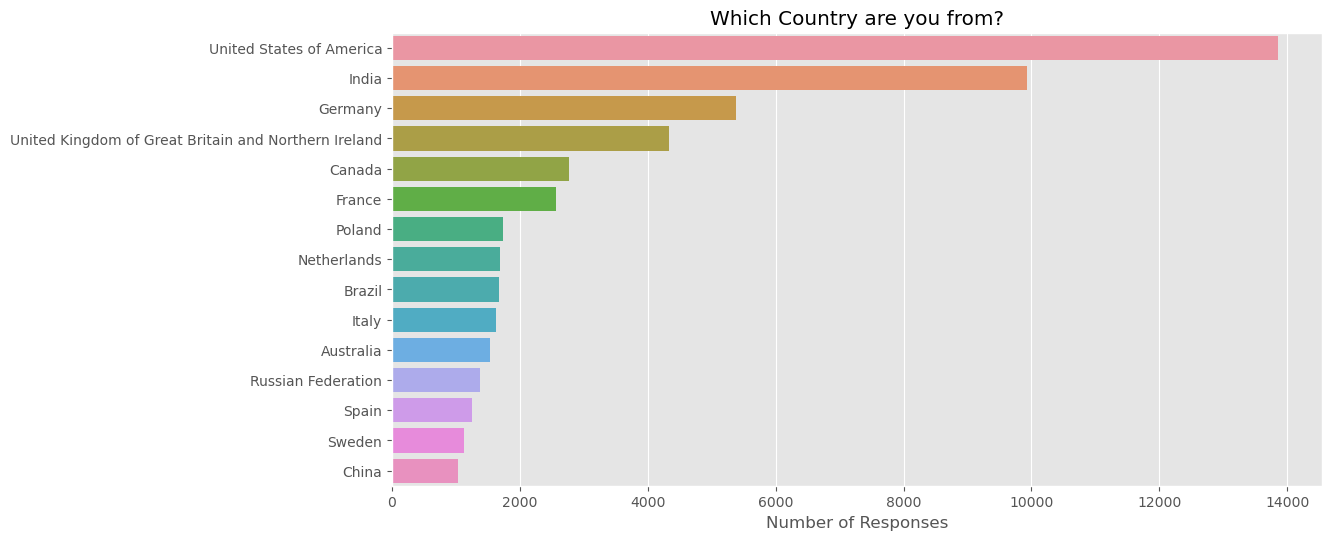

In [34]:
plt.figure(figsize=(12,6), dpi=100)

sns.barplot(x=country_high, y=country_high.index)
plt.xlabel('Number of Responses')
plt.ylabel(None)
plt.title('Which Country are you from?');

### Age 
Age at which most developers wrote their fisrst code

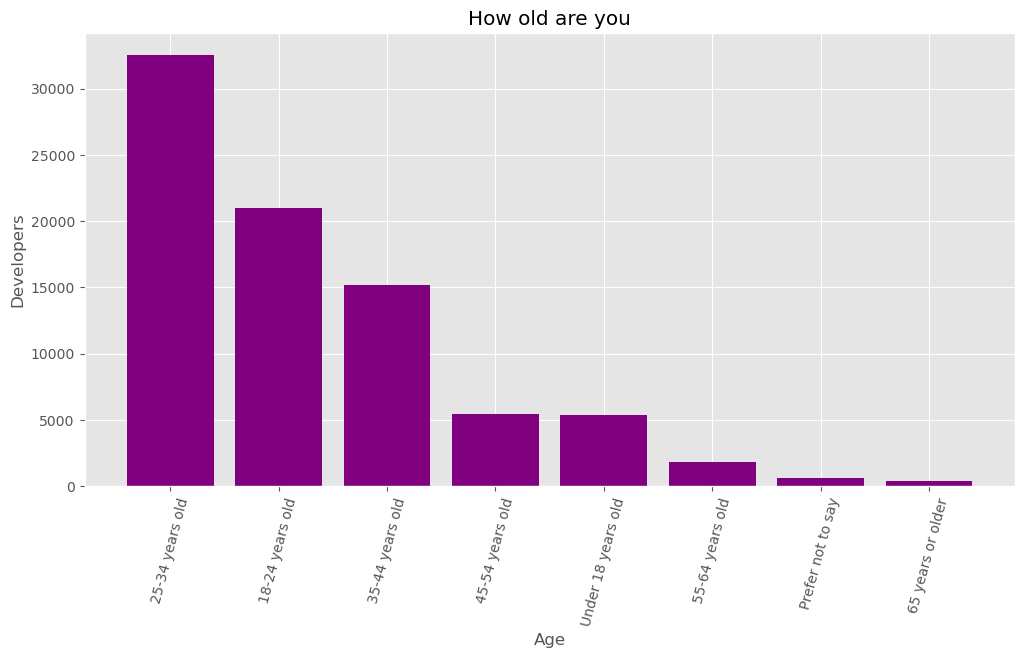

In [35]:
plt.figure(figsize=(12,6), dpi=100)

plt.bar(age.index, age, color='purple')
plt.xticks(rotation=75)
plt.title('How old are you')
plt.xlabel('Age')
plt.ylabel('Developers');

### Gender
Diversity of coding skills across different genders

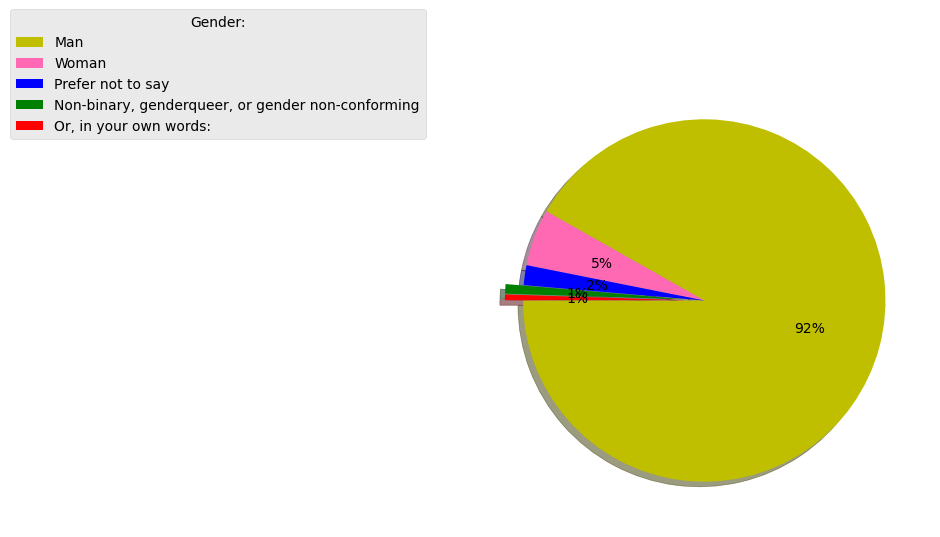

In [36]:
plt.figure(figsize=(12,6), dpi=100)

colors = ['y', 'hotpink', 'b', 'g', 'r']
labels = gender_new.index

plt.pie(gender_new, colors=colors, autopct='%1.0f%%', explode=(0,0,0,0.1,0.1), startangle=180, shadow=True)
plt.legend(labels, title='Gender:',loc='center right', bbox_to_anchor=(-0.1,1.));

# Education

### Education level
Highest level of education attained by each programmer responded


In [37]:
ed_level = survey_df.EdLevel.value_counts(normalize=True)*100
ed_level

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.689038
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.501373
Some college/university study without earning a degree                                12.454603
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    11.339052
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.120159
Primary/elementary school                                                              2.831183
Associate degree (A.A., A.S., etc.)                                                    2.628119
Something else                                                                         1.926506
Professional degree (JD, MD, etc.)                                                     1.509964
Name: EdLevel, dtype: float64

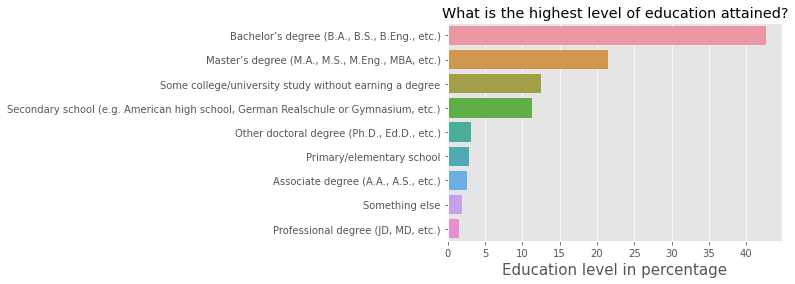

In [38]:
plt.figure(figsize=(12,6), dpi=300)
%matplotlib inline

sns.barplot(x=ed_level, y=ed_level.index)
plt.ylabel(None, fontsize=15)
plt.xlabel('Education level in percentage', fontsize=15)
plt.title('What is the highest level of education attained?');

# Age when 1st wrote a code
The age at which each responded programmer wrote their 1st code

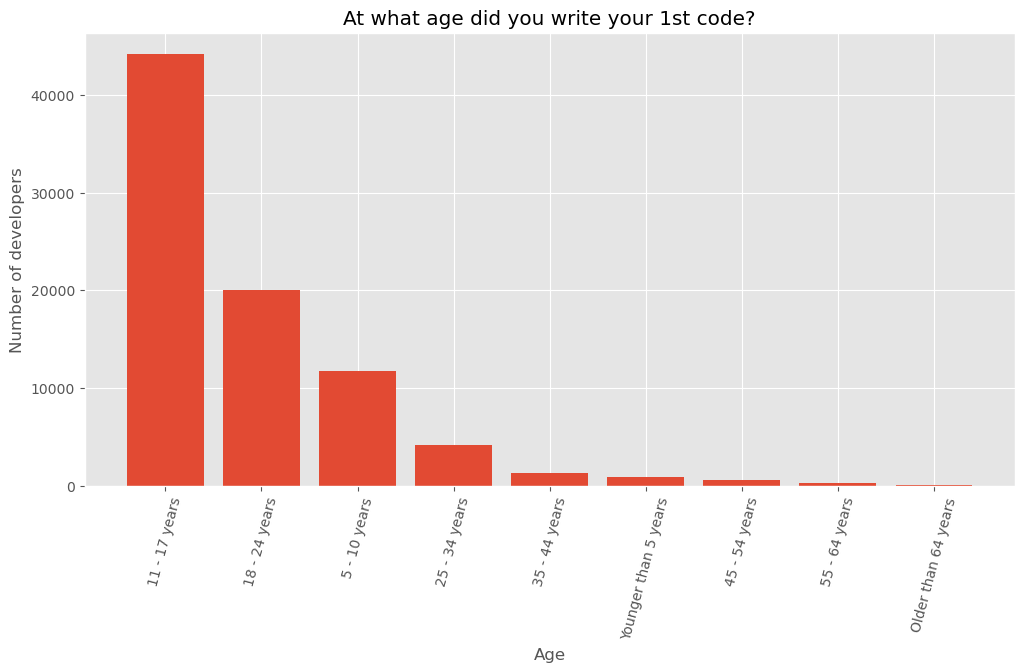

In [39]:
plt.figure(figsize=(12,6), dpi=100)

plt.bar(age1st.index, age1st)
plt.xticks(rotation=75)
plt.title('At what age did you write your 1st code?')
plt.xlabel('Age')
plt.ylabel('Number of developers');

### Language worked with
The most loved language is the most worked with

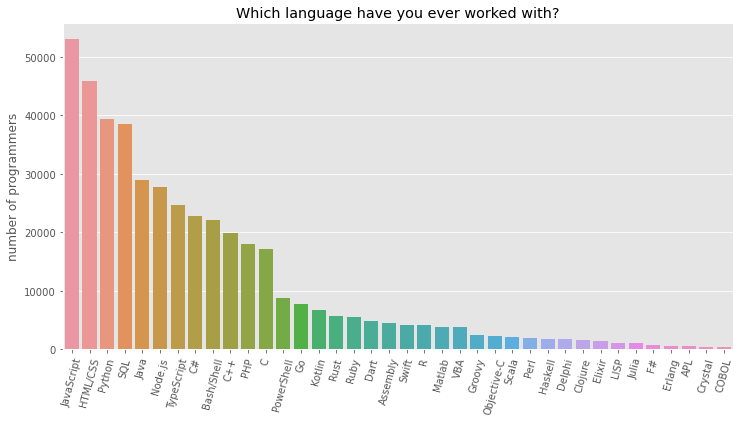

In [40]:
plt.figure(figsize=(12,6))


sns.barplot(x=lagww.index, y=lagww)
plt.xticks(rotation=75)
plt.ylabel('number of programmers')
plt.xlabel(None)
plt.title('Which language have you ever worked with?');

### Employment
Field in which most programmers are working in

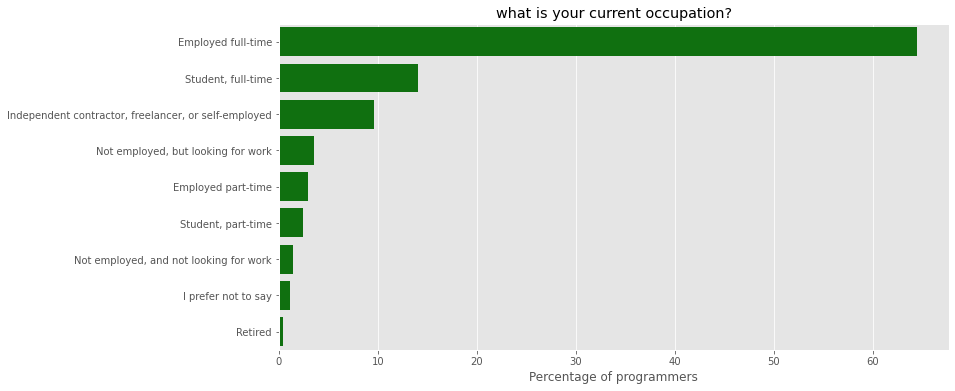

In [41]:
plt.figure(figsize=(12,6))

sns.barplot(x=employ, y=employ.index, color='g')
plt.title('what is your current occupation?')
plt.xlabel('Percentage of programmers')
plt.ylabel(None);

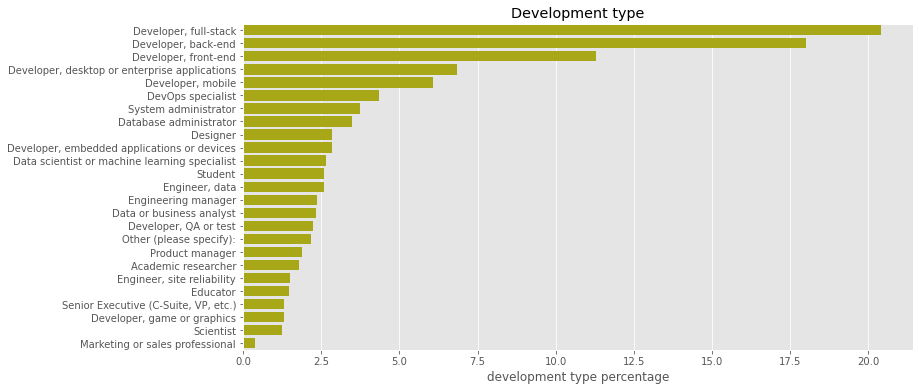

In [42]:
plt.figure(figsize=(12,6))

sns.barplot(x=dev_type, y=dev_type.index, color='y')
plt.title('Development type')
plt.xlabel('development type percentage')
plt.ylabel(None);

# ASKING & ANSWERING QUESTIONS

## Questions tha need deeper analysis will be asked and answered after an overall exploratory

### 1. What is the relationship between the Country of origin and the Gender of programmers

In [43]:
cg = survey_df.iloc[:, [0,2]]
cg

,Country,Gender
0,Slovakia,Man
1,Netherlands,Man
2,Russian Federation,Man
3,Austria,Man
4,United Kingdom of Great Britain and Northern I...,Man
...,...,...
83434,United States of America,Man
83435,Benin,Man
83436,United States of America,Man
83437,Canada,Man


In [44]:
cg_grouped = cg.groupby('Country')['Gender'].value_counts(dropna=True)
cg_grouped

Country      Gender                                           
Afghanistan  Man                                                  31
             Woman                                                 3
             Or, in your own words:                                2
             Non-binary, genderqueer, or gender non-conforming     1
             Prefer not to say                                     1
                                                                  ..
Zambia       Man                                                  20
             Prefer not to say                                     1
Zimbabwe     Man                                                  33
             Woman                                                 2
             Or, in your own words:                                1
Name: Gender, Length: 531, dtype: int64

## Is the level of education related to employment type?

In [45]:
ed_em = survey_df.iloc[:, [4,12]]
ed_em

,EdLevel,Employment
0,"Secondary school (e.g. American high school, G...","Independent contractor, freelancer, or self-em..."
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Student, full-time"
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Student, full-time"
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time
4,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em..."
...,...,...
83434,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time
83435,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em..."
83436,"Secondary school (e.g. American high school, G...",Employed full-time
83437,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time


In [46]:
ed_em.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          32795
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       16518
Some college/university study without earning a degree                                 9568
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8711
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2397
Primary/elementary school                                                              2175
Associate degree (A.A., A.S., etc.)                                                    2019
Something else                                                                         1480
Professional degree (JD, MD, etc.)                                                     1160
Name: EdLevel, dtype: int64

###### To study the relationship, we create a regression model with Employment as our dependent variable


In [47]:
dummy = pd.get_dummies(ed_em.EdLevel)
dummy

,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other doctoral degree (Ph.D., Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
83434,0,1,0,0,0,0,0,0,0
83435,0,1,0,0,0,0,0,0,0
83436,0,0,0,0,0,0,1,0,0
83437,0,1,0,0,0,0,0,0,0


In [48]:
dummy2 = pd.get_dummies(ed_em.Employment)
dummy2

,Employed full-time,Employed part-time,I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
83434,1,0,0,0,0,0,0,0,0
83435,0,0,0,1,0,0,0,0,0
83436,1,0,0,0,0,0,0,0,0
83437,1,0,0,0,0,0,0,0,0


In [ ]:
from statsmodels.formula.api import ols

dummies = pd.get_dummies(ed_em.Employment, ed_em.EdLevel)
dummies
fit = ols('dummy ~ dummy1',data=(dummy,dummy2)).fit()
fit.summary()